In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, SimpleRNN, LSTM, TimeDistributed
)



In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Reshape data for RNN and LSTM
x_train_rnn_lstm = x_train.reshape(x_train.shape[0], 28, 28)
x_test_rnn_lstm = x_test.reshape(x_test.shape[0], 28, 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# ----------------------------- CNN Implementation -----------------------------
print("Building CNN Model...")

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cnn_model.summary()

# Train the CNN model
cnn_history = cnn_model.fit(
    x_train_cnn, y_train,
    batch_size=128, epochs=10,
    validation_split=0.2, verbose=2
)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")


Building CNN Model...


C:\Users\haree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 - 6s - 17ms/step - accuracy: 0.8839 - loss: 0.3878 - val_accuracy: 0.9643 - val_loss: 0.1188
Epoch 2/10
375/375 - 6s - 16ms/step - accuracy: 0.9537 - loss: 0.1565 - val_accuracy: 0.9767 - val_loss: 0.0808
Epoch 3/10
375/375 - 6s - 15ms/step - accuracy: 0.9653 - loss: 0.1163 - val_accuracy: 0.9813 - val_loss: 0.0638
Epoch 4/10
375/375 - 6s - 15ms/step - accuracy: 0.9713 - loss: 0.0950 - val_accuracy: 0.9840 - val_loss: 0.0557
Epoch 5/10
375/375 - 6s - 16ms/step - accuracy: 0.9742 - loss: 0.0823 - val_accuracy: 0.9837 - val_loss: 0.0549
Epoch 6/10
375/375 - 6s - 16ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.9847 - val_loss: 0.0530
Epoch 7/10
375/375 - 5s - 14ms/step - accuracy: 0.9796 - loss: 0.0649 - val_accuracy: 0.9859 - val_loss: 0.0491
Epoch 8/10
375/375 - 5s - 14ms/step - accuracy: 0.9817 - loss: 0.0597 - val_accuracy: 0.9857 - val_loss: 0.0485
Epoch 9/10
375/375 - 5s - 14ms/step - accuracy: 0.9823 - loss: 0.0564 - val_accuracy: 0.9856 - val_loss:

In [4]:
# ----------------------------- RNN Implementation -----------------------------
print("\nBuilding RNN Model...")

rnn_model = Sequential([
    TimeDistributed(Dense(128), input_shape=(28, 28)),
    SimpleRNN(128, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

rnn_model.summary()

# Train the RNN model
rnn_history = rnn_model.fit(
    x_train_rnn_lstm, y_train,
    batch_size=128, epochs=10,
    validation_split=0.2, verbose=2
)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test_rnn_lstm, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_accuracy:.4f}")



Building RNN Model...


C:\Users\haree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 28, 128)             │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 - 4s - 11ms/step - accuracy: 0.8180 - loss: 0.5607 - val_accuracy: 0.9359 - val_loss: 0.2115
Epoch 2/10
375/375 - 2s - 7ms/step - accuracy: 0.9398 - loss: 0.2041 - val_accuracy: 0.9524 - val_loss: 0.1533
Epoch 3/10
375/375 - 2s - 6ms/step - accuracy: 0.9525 - loss: 0.1570 - val_accuracy: 0.9571 - val_loss: 0.1377
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.9598 - loss: 0.1331 - val_accuracy: 0.9628 - val_loss: 0.1353
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9643 - loss: 0.1174 - val_accuracy: 0.9692 - val_loss: 0.1077
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9689 - loss: 0.1055 - val_accuracy: 0.9688 - val_loss: 0.1030
Epoch 7/10
375/375 - 2s - 7ms/step - accuracy: 0.9705 - loss: 0.0998 - val_accuracy: 0.9663 - val_loss: 0.1184
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9729 - loss: 0.0922 - val_accuracy: 0.9747 - val_loss: 0.0939
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9730 - loss: 0.0899 - val_accuracy: 0.9661 - val_loss: 0.1136


In [5]:
# ----------------------------- LSTM Implementation -----------------------------
print("\nBuilding LSTM Model...")

lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(28, 28), return_sequences=False),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

lstm_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

lstm_model.summary()

# Train the LSTM model
lstm_history = lstm_model.fit(
    x_train_rnn_lstm, y_train,
    batch_size=128, epochs=10,
    validation_split=0.2, verbose=2
)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_rnn_lstm, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")


Building LSTM Model...


C:\Users\haree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,186 (383.54 KB)

 Trainable params: 98,186 (383.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 - 8s - 22ms/step - accuracy: 0.7159 - loss: 0.8657 - val_accuracy: 0.9272 - val_loss: 0.2330
Epoch 2/10
375/375 - 7s - 20ms/step - accuracy: 0.9421 - loss: 0.1888 - val_accuracy: 0.9603 - val_loss: 0.1300
Epoch 3/10
375/375 - 7s - 20ms/step - accuracy: 0.9588 - loss: 0.1308 - val_accuracy: 0.9694 - val_loss: 0.1015
Epoch 4/10
375/375 - 7s - 19ms/step - accuracy: 0.9685 - loss: 0.1020 - val_accuracy: 0.9744 - val_loss: 0.0847
Epoch 5/10
375/375 - 8s - 20ms/step - accuracy: 0.9740 - loss: 0.0839 - val_accuracy: 0.9722 - val_loss: 0.0921
Epoch 6/10
375/375 - 8s - 21ms/step - accuracy: 0.9779 - loss: 0.0701 - val_accuracy: 0.9787 - val_loss: 0.0740
Epoch 7/10
375/375 - 7s - 20ms/step - accuracy: 0.9794 - loss: 0.0644 - val_accuracy: 0.9811 - val_loss: 0.0661
Epoch 8/10
375/375 - 7s - 19ms/step - accuracy: 0.9815 - loss: 0.0580 - val_accuracy: 0.9743 - val_loss: 0.0846
Epoch 9/10
375/375 - 7s - 20ms/step - accuracy: 0.9843 - loss: 0.0496 - val_accuracy: 0.9765 - val_loss:

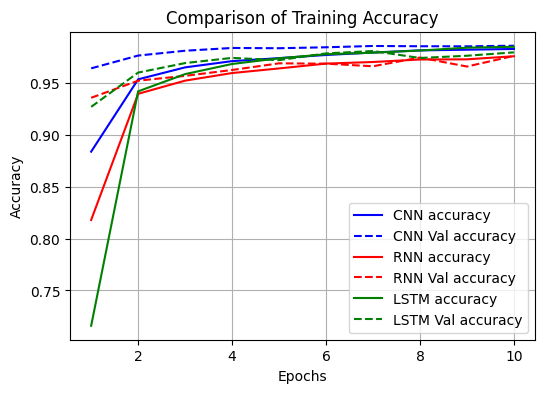

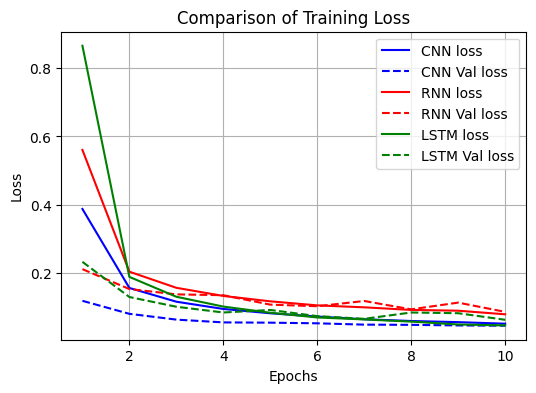


Test Accuracy Comparison:
CNN Accuracy: 0.9870
RNN Accuracy: 0.9783
LSTM Accuracy: 0.9806


In [11]:
# ----------------------------- Visualization -----------------------------
def plot_comparison(history1, history2, history3, metric, title):
    plt.figure(figsize=(6, 4))
    epochs = range(1, len(history1.history[metric]) + 1)
    
    plt.plot(epochs, history1.history[metric], 'b', label=f'CNN {metric}')
    plt.plot(epochs, history1.history[f'val_{metric}'], 'b--', label=f'CNN Val {metric}')
    
    plt.plot(epochs, history2.history[metric], 'r', label=f'RNN {metric}')
    plt.plot(epochs, history2.history[f'val_{metric}'], 'r--', label=f'RNN Val {metric}')
    
    plt.plot(epochs, history3.history[metric], 'g', label=f'LSTM {metric}')
    plt.plot(epochs, history3.history[f'val_{metric}'], 'g--', label=f'LSTM Val {metric}')
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot accuracy comparison
plot_comparison(cnn_history, rnn_history, lstm_history, 'accuracy', 'Comparison of Training Accuracy')

# Plot loss comparison
plot_comparison(cnn_history, rnn_history, lstm_history, 'loss', 'Comparison of Training Loss')

# Print test accuracy comparison
print(f"\nTest Accuracy Comparison:")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"RNN Accuracy: {rnn_accuracy:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


Model Performance Comparison:
  Model  Test Accuracy  Test Loss
0   CNN         0.9870   0.038638
1   RNN         0.9783   0.078653
2  LSTM         0.9806   0.059163


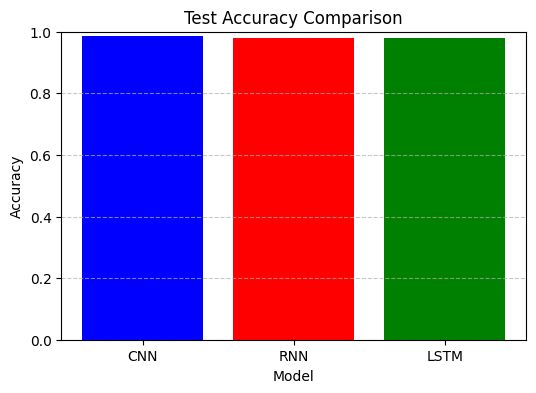

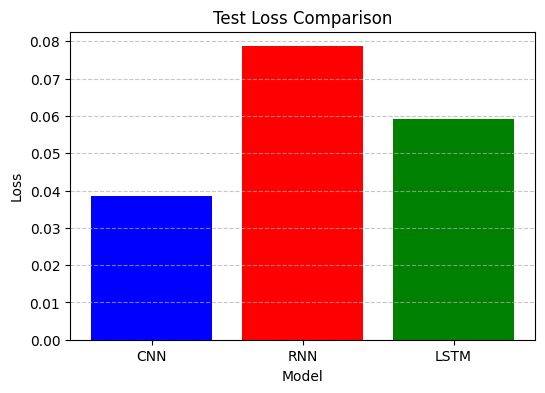


Insights:
The model with the highest accuracy is: **CNN**
Test Accuracy Scores:
CNN: 0.9870
RNN: 0.9783
LSTM: 0.9806

Test Loss Scores:
CNN: 0.0386
RNN: 0.0787
LSTM: 0.0592


In [12]:
# ----------------------------- Comparison Section -----------------------------
import pandas as pd

# Collect metrics for comparison
comparison_data = {
    'Model': ['CNN', 'RNN', 'LSTM'],
    'Test Accuracy': [cnn_accuracy, rnn_accuracy, lstm_accuracy],
    'Test Loss': [cnn_loss, rnn_loss, lstm_loss],
}

# Convert to a DataFrame for tabular representation
comparison_df = pd.DataFrame(comparison_data)

# Print comparison table
print("\nModel Performance Comparison:")
print(comparison_df)

# Bar plot for test accuracy
plt.figure(figsize=(6,4))
plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=['blue', 'red', 'green'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for test loss
plt.figure(figsize=(6,4))
plt.bar(comparison_df['Model'], comparison_df['Test Loss'], color=['blue', 'red', 'green'])
plt.title('Test Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print insights
best_model = comparison_df.loc[comparison_df['Test Accuracy'].idxmax()]['Model']
print(f"\nInsights:")
print(f"The model with the highest accuracy is: **{best_model}**")
print(f"Test Accuracy Scores:")
for i, row in comparison_df.iterrows():
    print(f"{row['Model']}: {row['Test Accuracy']:.4f}")

print("\nTest Loss Scores:")
for i, row in comparison_df.iterrows():
    print(f"{row['Model']}: {row['Test Loss']:.4f}")



Model Performance Comparison:
  Model  Test Accuracy  Test Loss
0   CNN         0.9870   0.038638
1   RNN         0.9783   0.078653
2  LSTM         0.9806   0.059163


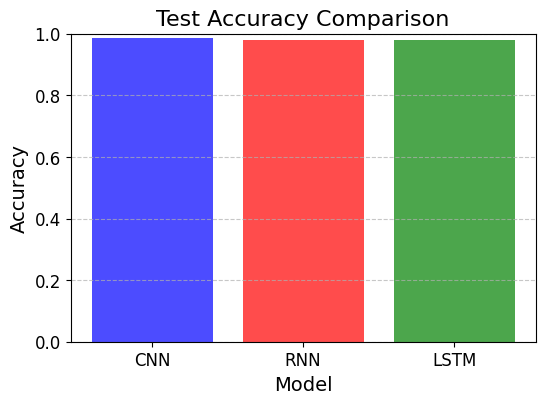

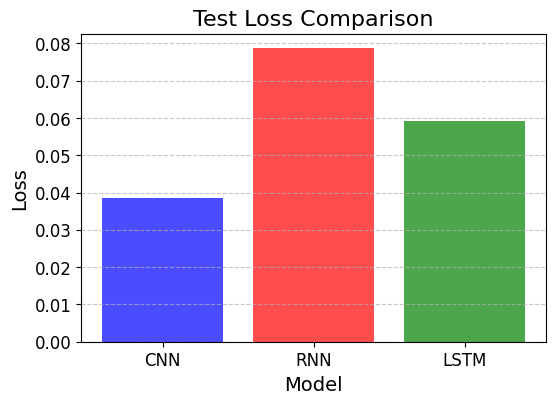

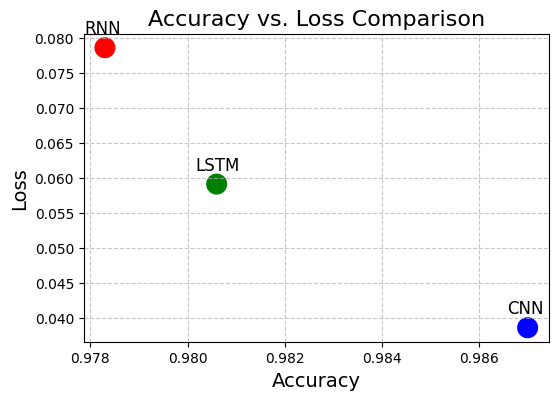


Insights:
The model with the highest accuracy is: **CNN**
Test Accuracy Scores:
CNN: 0.9870
RNN: 0.9783
LSTM: 0.9806

Test Loss Scores:
CNN: 0.0386
RNN: 0.0787
LSTM: 0.0592


In [10]:
# ----------------------------- Comparison Section -----------------------------
import pandas as pd

# Collect metrics for comparison
comparison_data = {
    'Model': ['CNN', 'RNN', 'LSTM'],
    'Test Accuracy': [cnn_accuracy, rnn_accuracy, lstm_accuracy],
    'Test Loss': [cnn_loss, rnn_loss, lstm_loss],
}

# Convert to a DataFrame for tabular representation
comparison_df = pd.DataFrame(comparison_data)

# Print comparison table
print("\nModel Performance Comparison:")
print(comparison_df)

# Bar plot for test accuracy
plt.figure(figsize=(6, 4))
plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Test Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Bar plot for test loss
plt.figure(figsize=(6, 4))
plt.bar(comparison_df['Model'], comparison_df['Test Loss'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Test Loss Comparison', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Accuracy vs. Loss Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(comparison_df['Test Accuracy'], comparison_df['Test Loss'], color=['blue', 'red', 'green'], s=200)
for i, txt in enumerate(comparison_df['Model']):
    plt.annotate(txt, (comparison_df['Test Accuracy'][i], comparison_df['Test Loss'][i]), fontsize=12, xytext=(-15, 10), textcoords='offset points')

plt.title('Accuracy vs. Loss Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print insights
best_model = comparison_df.loc[comparison_df['Test Accuracy'].idxmax()]['Model']
print(f"\nInsights:")
print(f"The model with the highest accuracy is: **{best_model}**")
print(f"Test Accuracy Scores:")
for i, row in comparison_df.iterrows():
    print(f"{row['Model']}: {row['Test Accuracy']:.4f}")

print("\nTest Loss Scores:")
for i, row in comparison_df.iterrows():
    print(f"{row['Model']}: {row['Test Loss']:.4f}")
